<a href="https://colab.research.google.com/github/18jayanth/01-STARTING-PROJECT/blob/main/Magic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#creating columns for this dataset
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
#to find unique values in column "class"
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
#to convert "class" column values into numbers
df["class"]=(df["class"]=='g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


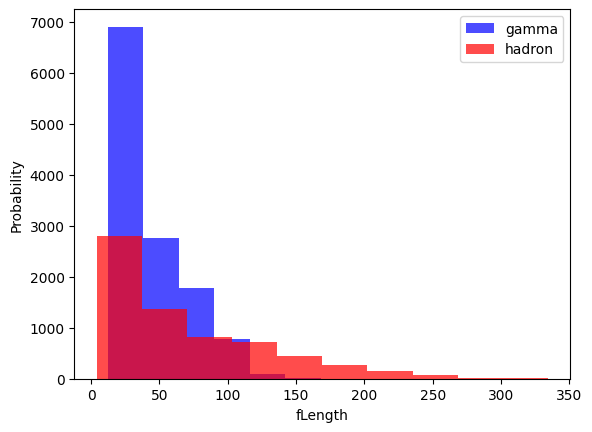

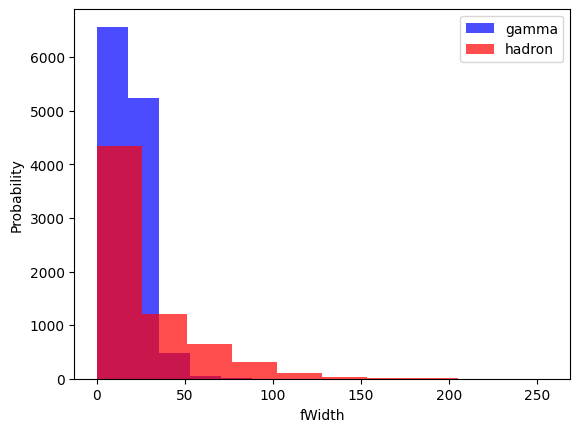

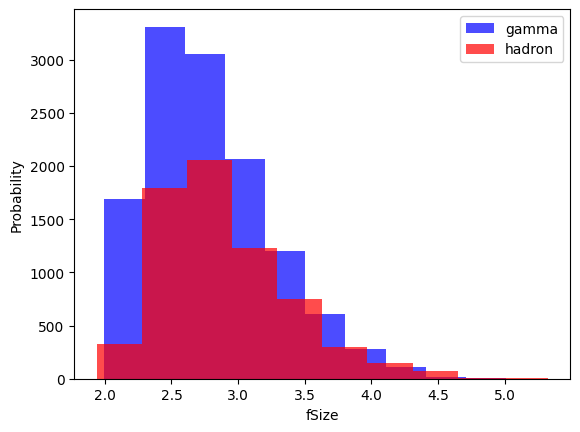

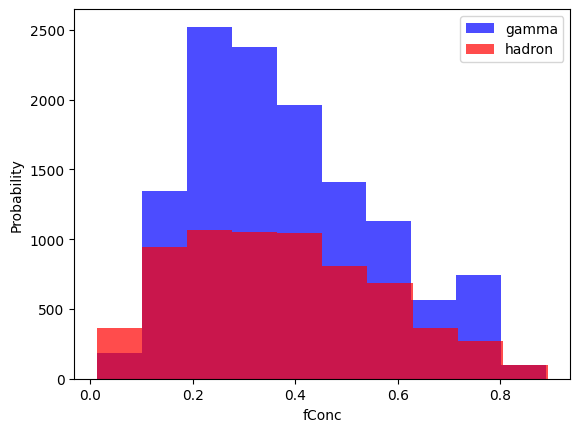

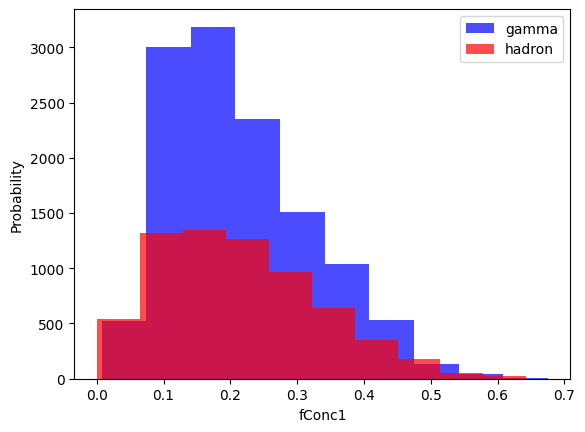

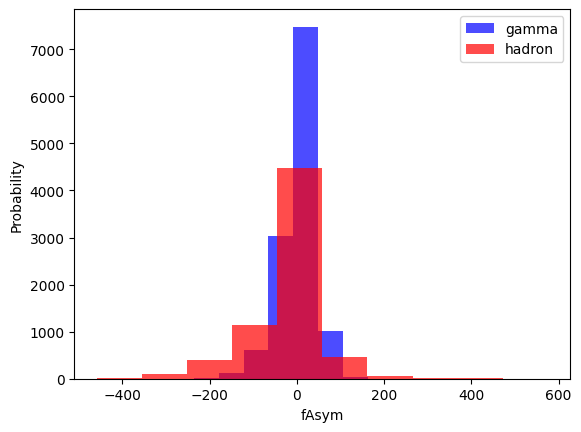

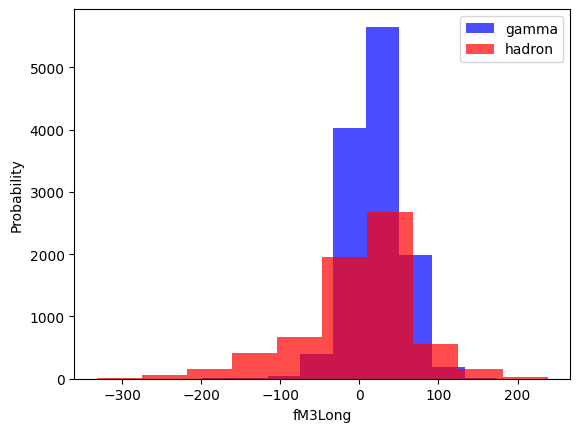

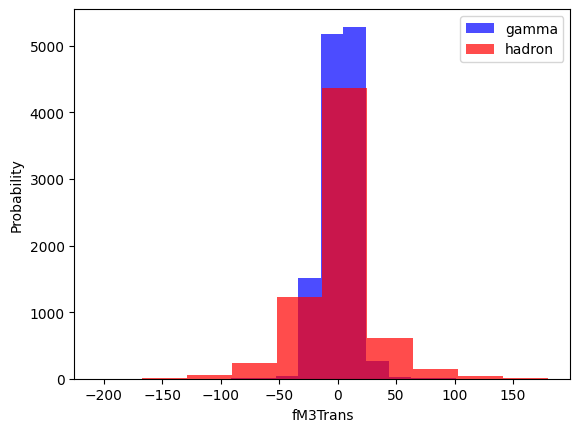

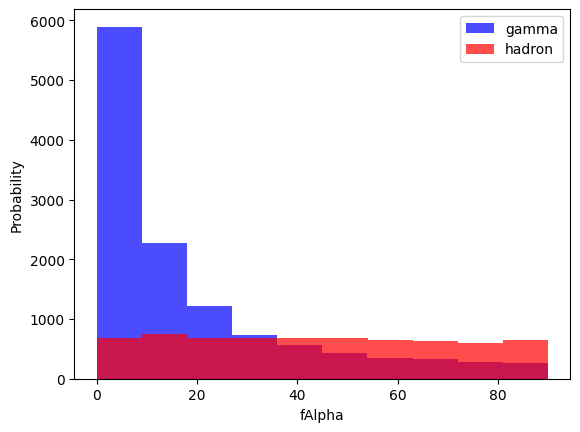

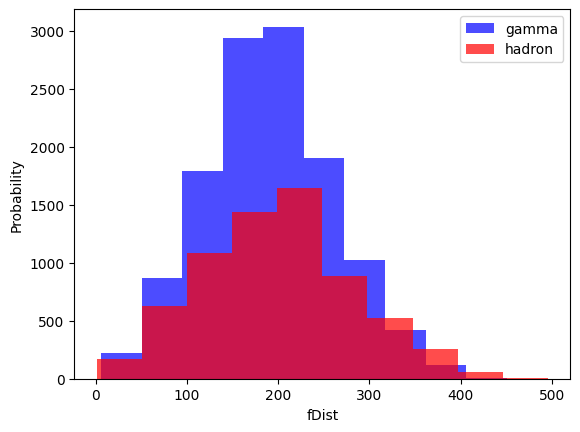

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='blue',label="gamma",alpha=0.7,density=False)
  plt.hist(df[df['class']==0][label],color='red',label="hadron",alpha=0.7,density=False)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


**Train,Valid and Test Datsets**

In [ ]:
#to split the data into training,validation and test datasets
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
#we need to scale the data so that data is uniform across all the features (make all values around mean )
def scale_dataset(dataframe,over_sample=False):
  #taking only features
  x=dataframe[dataframe.columns[:-1]].values
  #taking the last column label
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  #this will transform the fature values such that their mean is 0 standard deviation is 1,this has same shape as before
  X=scaler.fit_transform(x)
  #this will combine X and y but it will change y from row to column to combine
  if over_sample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(len(y),1))))
  return data,X,y

In [ ]:
train,X_train,y_train=scale_dataset(train,over_sample=True)
valid,X_train,y_train=scale_dataset(valid,over_sample=False)
test,X_train,y_train=scale_dataset(test,over_sample=False)

In [ ]:
train

array([[-0.48870378, -0.19683942, -0.44378109, ..., -0.57150838,
        -0.50772954,  1.        ],
       [-0.01531668,  0.20765876,  0.79723337, ..., -0.71181848,
         0.70501961,  1.        ],
       [-0.30127833,  0.17111526,  0.83388869, ..., -0.46965549,
         0.85265875,  0.        ],
       ...,
       [-0.61130827, -0.92716049, -0.3887981 , ...,  1.38057293,
         0.43288235,  0.        ],
       [ 1.63080756,  0.34375407,  0.22064933, ...,  0.56619108,
        -1.444988  ,  0.        ],
       [-0.37945969, -0.55571999, -0.82529139, ...,  0.09767468,
        -1.78408764,  0.        ]])

In [ ]:
print(len(train[train[:,-1]==1]))#gamma
print(len(train[train[:,-1]==0]))#hadron

7419
7419


In [ ]:
print(sum(y_train==1))

2474


In [ ]:
print(sum(y_train==0))

1330
